<div style="background-color:yellow; text-align:center; text-align:center; padding:40px;">
<h1  style="color:red;" > DI-725 : Transformers and Attention-Based Deep Networks </h1>   
<h2  style="color:red;" > Final Project: Phase - 2 </h2>
<br>
    <h2  style="color:red;" > Explaratory Data Analysis (EDA)</h2>
<br>
<h4  style="color:red;" >Turgay Yıldız</h4>
<br>
<h4  style="color:red;" >Graduate School of Informatics,  Middle East Technical University (METU)</h4>
</div>


<div span style="background-color:yellow;    color:red;      text-align:center;    padding:5px;">
<h2>  First Import the Relevant Packages  </h2>
</div>

In [1]:


from nltk.tokenize import word_tokenize

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np


import json

import tqdm
from PIL import Image

import wandb
import os


<div span style="background-color:yellow;    color:red;      text-align:center;    padding:5px;">
<h2>  Import Dataset  </h2>
</div>

In [2]:
path            =     "/home/turgay/Turgay/Academic/2024-2025/Spring/Transformers/Project/RISCM/" 

In [3]:
images_p        =    os.listdir(path + "resized/")
captions_p      =    path + "captions.csv" 

In [4]:
images_p[:5]

['NWPU_112.jpg',
 'RSICD_6644.jpg',
 'NWPU_28028.jpg',
 'NWPU_14741.jpg',
 'NWPU_20089.jpg']

In [5]:
data   =  pd.read_csv(captions_p)

In [6]:
data.head()

,source,split,image,caption_1,caption_2,caption_3,caption_4,caption_5
0,NWPU,test,NWPU_31430.jpg,A gray plane on the runway and the lawn beside .,A grey plane is on the runway by the lawn .,There is an airplane on the runway with a larg...,A plane is parked on the runway next to the gr...,There is a plane on the runway beside the grass .
1,NWPU,test,NWPU_31431.jpg,Three small planes parked in a line on the air...,"There are four aircraft on the open ground, Th...",There are many planes of different sizes in a ...,Four planes are parked on the runway .,Four planes of different sizes were on the mar...
2,NWPU,test,NWPU_31432.jpg,A plane parked in a line on the airport with s...,A white plane was parked on the instruction li...,An airplane parked in an open area with many c...,A plane is parked on the open space .,There is 1 plane on the ground marked .
3,NWPU,test,NWPU_31433.jpg,A small plane and a big plane parked next to b...,A white plane and a gray plane parked at the b...,Two planes of different sizes are neatly parke...,A large plane and a small plane are parked nea...,Two planes are on the marked ground .
4,NWPU,test,NWPU_31434.jpg,Two planes parked next to boarding bridges .,Two aircraft were parked at the departure gates .,Two planes of different sizes are neatly parke...,Two planes are parked next to the terminal .,Two planes are on the marked ground .


In [7]:
len(data)

44521

<div span style="background-color:yellow;    color:red;      text-align:center;    padding:5px;">
<h2>  Exploratory Data Analysis (EDA)  </h2>
</div>


### Data is divided into 3 parts: Train, Validation and Test 

In [14]:
data["split"]

0         test
1         test
2         test
3         test
4         test
         ...  
44516    train
44517    train
44518    train
44519    train
44520    train
Name: split, Length: 44521, dtype: object

### Number of images for each split set : 

In [15]:
split_series = data['split']
counts       = split_series.value_counts()

print(counts)

split
train    35614
test      4454
val       4453
Name: count, dtype: int64


In [16]:
num_train = counts.get('train', 0)
num_test  = counts.get('test', 0)
num_val   = counts.get('val', 0)

print("Number of train samples:", num_train)
print("Number of test samples:", num_test)
print("Number of val samples:", num_val)

Number of train samples: 35614
Number of test samples: 4454
Number of val samples: 4453


###  1-) Check for Missing Values : 

In [17]:
if 1:
    
    print(data.isnull().sum())

source       0
split        0
image        0
caption_1    0
caption_2    0
caption_3    0
caption_4    0
caption_5    0
dtype: int64


### 2-) Statistical Summary : 

In [55]:
data.describe(include='all')

,source,split,image,caption_1,caption_2,caption_3,caption_4,caption_5
count,44521,44521,44521,44521,44521,44521,44521,44521
unique,3,3,44521,22503,14838,16113,12775,18289
top,NWPU,train,NWPU_31430.jpg,This meadow has different sparsity in differen...,The entire image is dominated by grass .,The snow berg is consist of bare land and whit...,The meadow is dense but uneven .,The grass is beside the beach .
freq,31500,35614,1,130,435,448,288,232


### Most common themes for captions are grass, snow, land, meadow , beach etc. 

In [56]:
data.describe(include='all').loc['top']

source                                                    NWPU
split                                                    train
image                                           NWPU_31430.jpg
caption_1    This meadow has different sparsity in differen...
caption_2             The entire image is dominated by grass .
caption_3    The snow berg is consist of bare land and whit...
caption_4                     The meadow is dense but uneven .
caption_5                      The grass is beside the beach .
Name: top, dtype: object

In [61]:
data.describe(include='all').loc['top']["caption_5"]

'The grass is beside the beach .'

### There 5 captions for each image. 

In [65]:
total_images     = len(data)
captions_per_img = 5
total_captions   = total_images * captions_per_img
print(f"Total captions: {total_captions}")

Total captions: 222605


### Statistics about the length of the captions : 

In [66]:
all_captions = []

for i in range(1, 6):
    all_captions.extend(data[f'caption_{i}'].tolist())

# Tokenize and compute word counts
caption_lengths = [len(word_tokenize(caption)) for caption in all_captions]



min_len   = np.min(caption_lengths)
max_len   = np.max(caption_lengths)
mean_len  = np.mean(caption_lengths)
median_len= np.median(caption_lengths)

print(f"Min: {min_len}, Max: {max_len}, Mean: {mean_len:.2f}, Median: {median_len}")

Min: 5, Max: 51, Mean: 12.19, Median: 11.0


### Most common words : 

In [67]:
from collections import Counter
import string

In [68]:
# Build list of all words
all_tokens = []
for caption in all_captions:
    tokens = word_tokenize(caption.lower())
    tokens = [word for word in tokens if word.isalpha()]  # remove punctuation/numbers
    all_tokens.extend(tokens)

# Vocabulary size
vocab_size = len(set(all_tokens))
print(f"Vocabulary size: {vocab_size}")

# Top 20 words
word_counts = Counter(all_tokens)
top_20_words = word_counts.most_common(20)
print("Top 20 words:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")

Vocabulary size: 3565
Top 20 words:
the: 205467
a: 117753
are: 110828
and: 100622
is: 77975
there: 73976
of: 69650
some: 62091
many: 61774
green: 61300
on: 55452
in: 54672
trees: 51503
buildings: 47186
with: 43122
to: 26743
next: 24675
area: 24371
by: 21303
two: 18839


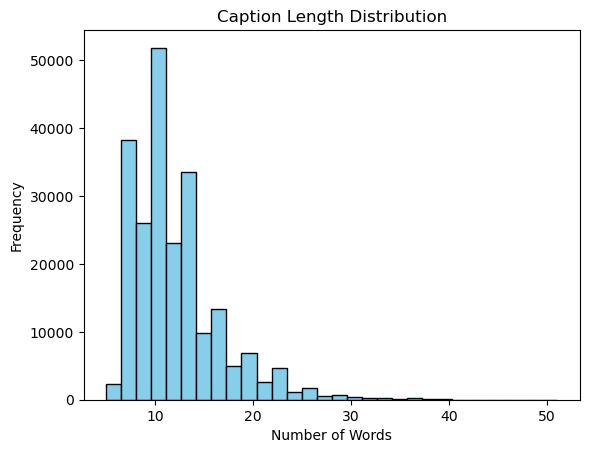

In [69]:
plt.hist(caption_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Caption Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

<div span style="background-color:yellow;    color:red;      text-align:center;    padding:5px;">
<h2>  Dataset :   </h2>
</div>


In [14]:
from transformers import BertTokenizer

tokenizer    = BertTokenizer.from_pretrained('bert-base-uncased') 

In [15]:

class RSICDDataset(Dataset):
    def __init__(self, dataframe, images_dir, transform=None):
        
        self.dataframe      =   dataframe
        self.images_dir     =   images_dir
        self.transform      =   transform
        self.tokenizer      =   BertTokenizer.from_pretrained('bert-base-uncased')

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        
        row         =    self.dataframe.iloc[idx]
        img_path    =    f"{self.images_dir}/{row['image']}"
        image       =    Image.open(img_path).convert('RGB')
        image       =    np.array(image) / 255.
        
        captions    =    row[3:].tolist()  # Assuming captions start from 4th column

        if self.transform:
            image = self.transform(image)

        # Tokenize captions (this step converts text to token IDs)
        captions_tokenized = [self.tokenizer(caption, padding='max_length', truncation=True, max_length=64, return_tensors='pt')['input_ids'] for caption in captions]

        # Stack tokenized captions into a single tensor
        captions_tensor = torch.stack([caption.squeeze() for caption in captions_tokenized])  # Stack each caption tensor into a batch

        return image, captions_tensor


In [16]:
train_data = data[data['split'] == 'train'].reset_index(drop=True)
val_data   = data[data['split'] == 'val'].reset_index(drop=True) 
test_data  = data[data['split'] == 'test'].reset_index(drop=True)

In [17]:
train_dataset    =   RSICDDataset(train_data, path + "resized")
val_dataset      =   RSICDDataset(val_data,   path + "resized")
test_dataset     =   RSICDDataset(test_data,  path + "resized") 

In [18]:
len(train_dataset), len(val_dataset),  len(test_dataset) 

(35614, 4453, 4454)

In [19]:
train_loader    =   DataLoader(train_dataset, batch_size=8, num_workers  =   8,   pin_memory = True,    shuffle=True)
val_loader      =   DataLoader(val_dataset,   batch_size=8, num_workers  =   8,   pin_memory = True,    shuffle=True) 
test_loader     =   DataLoader(test_dataset,   batch_size=8, num_workers  =   8,   pin_memory = True,    shuffle=True) 

In [20]:
for img, cap in train_loader:
    break

In [21]:
img.shape

torch.Size([8, 224, 224, 3])

In [22]:
num  =  0

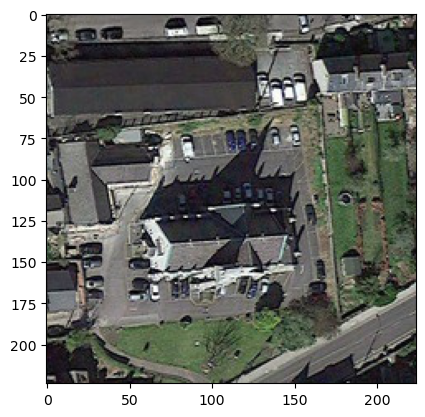

In [23]:
plt.imshow(img[num])

In [24]:
cap[num].shape

torch.Size([5, 64])

In [25]:
tokens   =    [tokenizer.decode(cap[num][i].squeeze(), skip_special_tokens=True)  for i in range(5)]

In [26]:
tokens

['the buildings are colorful and the roads are grey.',
 'the buildings are colorful and the roads are grey.',
 'a church surrounded by some cars is surrounded by several buildings and two roads.',
 'a church surrounded by some cars is surrounded by several buildings and two roads.',
 'a church surrounded by some cars is surrounded by several buildings and two roads.']